### Code to generate a center drill pattern on the Shapeoko  - 2022 0129 CJH
* Give it a list of (x,y) points
* Update feeds (travel, drill, retract) if necessary
* Generates g-code for the router, saves to a file and shows you an image 

In [219]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [220]:
pwd

'C:\\Users\\2429F\\Documents\\GrabCAD\\FRC 2429\\2022\\CAM\\router\\shooter'

In [221]:
cd "C:\Users\2429F\Documents\GrabCAD\FRC 2429\2022\CAM\router\shooter"

C:\Users\2429F\Documents\GrabCAD\FRC 2429\2022\CAM\router\shooter


#### choose whether to save file and set description

In [222]:
save_file = True  # save file?
sort = 'y'
description = 'shooter arm '
outfile = f'{description}center_drill_{datetime.today().strftime("%Y%m%d_%H%M%S")}.nc'
outfile

'shooter arm center_drill_20220129_143534.nc'

#### set up a list of points and an optional bounding box

In [223]:
point_list = [ [0.79289,2.70711],
             [2.20711,2.70711],
            [2.20711,1.29289],
              [.79289,1.29289],
              [0.5, 18.5],
              [2.5, 18.5],
              [2.5, 0.5],
              [0.5, 0.5],
              [1.5, 5.198],
              [1.5, 2],
             ]
bounding_box = [[0,0],[3,0], [0,19], [3,19]]  # shooter 2022
add_bounding_box = True  # do you want markers in the corners for locating?

#### set feeds and speeds

In [224]:
# heights
drill_depth = -0.12  # how deep to make each hole - 0.125 is good for the center drill 
retract_height = 0.5  # how high to be to gravel to next hole
engage_hight = 0.1  # when we slow down on approach
# feeds
linear_feed = 100  # fast motion to travel in x,y when not cutting 
drill_feed = 5  # cut feed rate
retract_feed = 30  # pull back feed rate

#### the rest of this need not be touched by user

In [225]:
intro_code = f'; ## CENTER DRILL CODE AUTOGENERATED FROM POINT LIST - CJH {datetime.today().strftime("%Y %m%d %H:%M:%S")}\nN1 G90 G20 G00 Z1. M00\n; N2 (1/8 EM CRB 2FL 1/2 LOC)\nN3 S12000 M03\nG01 Z{retract_height} F{retract_feed}\n'
outro_code = '; ## END OF POINTS\nN1520 G91 G28 Z0\nN1521 G28 X0 Y0\n; ## END OF AUTOGENERATED PROGRAM'

In [226]:
# Sort bounding box, add bb if necessary
if add_bounding_box:
    point_list = point_list + bounding_box
if sort == 'y':
    point_list.sort(key=lambda x:x[1])
else:
    point_list.sort()
point_list

[[0, 0],
 [3, 0],
 [2.5, 0.5],
 [0.5, 0.5],
 [2.20711, 1.29289],
 [0.79289, 1.29289],
 [1.5, 2],
 [0.79289, 2.70711],
 [2.20711, 2.70711],
 [1.5, 5.198],
 [0.5, 18.5],
 [2.5, 18.5],
 [0, 19],
 [3, 19]]

In [231]:
command = intro_code
for ix, point in enumerate(point_list):
    # move to x,y, drill, retract
    message = f'; ##POINT #{ix}:\n'
    message = message + f'G00 X{point[0]} Y{point[1]} F{linear_feed}\n'
    message = message + f'G01 Z{engage_hight} F{retract_feed}\n'
    message = message + f'Z{drill_depth} F{drill_feed}\n'
    message = message + f'Z{retract_height} F{retract_feed}\n'
    command = command + message

command = command + outro_code
#print(command)

In [228]:
# save the file
if save_file: 
    with open(outfile, "w") as text_file:
        text_file.write(command)

#### plot the points - sanity check

In [229]:
x = np.array([p[0] for p in point_list])
y = np.array([p[1] for p in point_list])

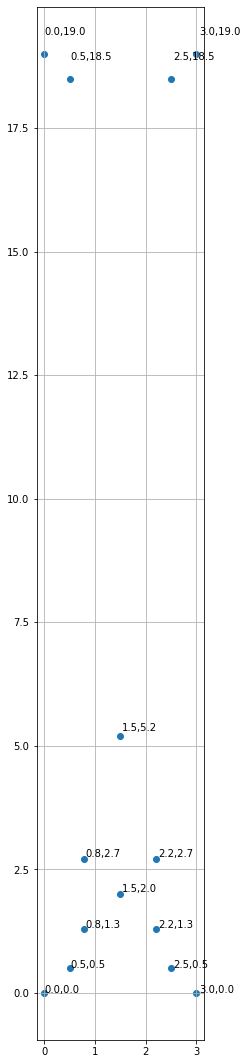

In [238]:
# plot with labels and correct aspect ratio
x_range = np.max(x) - np.min(x)
y_range = np.max(y) - np.min(y)
fig, ax = plt.subplots(figsize=(x_range,y_range))
ax.scatter(*zip(*point_list))
for ix, point in enumerate(zip(x,y)):
    ax.annotate(f'{point[0]:.1f},{point[1]:.1f}', xy=(point[0], point[1]),  xycoords='data',
            xytext=(point[0], point[1]), textcoords='offset points',)
ax.grid(True)
